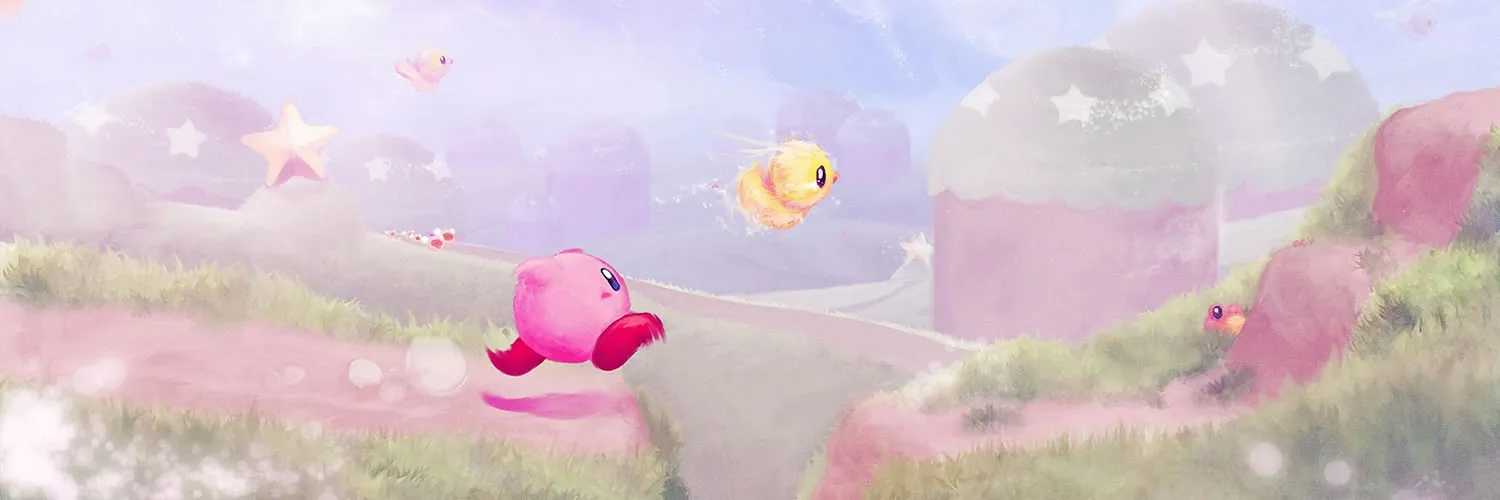

<div style="text-align:center">
    <h1><strong>ANÁLISIS EXPLORATORIO</strong></h1>
    <h1><strong>DE LA REPRESENTACIÓN DEL GÉNERO EN LOS VIDEOJUEGOS</strong></h1>
</div>

### **ÍNDICE**

1. [Importacion de bibliotecas](#importacion-de-bibliotecas)
2. [Lectura de datos](#lectura-de-datos)
    - [Limpieza de datos](#limpieza-de-datos)
3. [Hipotesis 1](#hipotesis-1)
    - [Conclusiones 1](#31-conclusiones-1)
4. [Hipotesis 2](#hipotesis-2)
    - [Conclusiones 2](#conclusiones-2)
5. [Hipotesis 3](#hipotesis-3)
    - [Conclusiones 3](#conclusiones-3)
6. [Hipotesis 4](#hipotesis-4)
    - [Conclusiones 4](#conclusiones-4)


## Importacion de bibliotecas

In [35]:
#Importar bibliotecas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, mannwhitneyu
from bootcampviztools import *

# Configurar Pandas para mostrar todas las columnas y filas porque Games es un conjunto de datos muy grande
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Lectura de datos

In [36]:
#Importar los datos
df_games = pd.read_csv("./data/games.grivg.csv")
df_char = pd.read_csv("./data/characters.grivg.csv")
df_sex = pd.read_csv("./data/sexualization.grivg.csv")

### Limpieza de datos

In [37]:
'''Exploratorio inicial y creacion de copias'''

#Primer df

df_juegos = df_games.copy()
#df_juegos.info()

In [38]:
df_juegos.drop(columns= ["Series"], inplace=True)
df_juegos["Release"] = pd.to_datetime(df_juegos["Release"], format='%b-%y')
df_juegos["Release"]=df_juegos['Release'].dt.year #para que solo salga el año
#df_juegos["Release"]

In [39]:
# Segundo DF

df_pnj = df_char.copy()
#df_pnj.info()

In [40]:
df_pnj.drop(columns= ["Age"], inplace=True)

In [41]:
# Tercer df

#df_sex.info()

In [42]:
''' Unión de dataframes y df final'''

personajes = df_pnj.rename(columns={"Game": "Game_Id"}) #renombro col Game en el df_pnj

merge1 = pd.merge(personajes, df_juegos, on= "Game_Id", how="left") #fusiono personajes con el df_juegos en Game_Id
df = pd.merge(merge1, df_sex, on = "Id", how="left") #fusiono el df merge1 con sex, para obtener un df con TODOS los datos

# Elimino la col Unnamed:27 porque está completo por NaN y no aporta nada
df.drop(columns=["Unnamed: 27"], inplace=True)

# Elimino la col Sexualization porque es igual que Total y cambio el nombre de Total por Sex_Total
df.drop(columns=["Total"], inplace=True)
df.rename(columns={"Sexualization": "Sex_Total"},inplace=True)

# Elimino el resto de columnas que no voy a utilizar 
df.drop(columns=['Sub-genre','Game_Id','Id','Criteria','Destructoid', 'IGN','GameSpot','Metacritic ','Age_range','Species',
       'Side', 'Romantic_Interest','Country', 'Platform', 'PEGI', ], inplace=True)

# columnas del df que vamos a usar
df.columns

Index(['Name', 'Gender', 'Playable', 'Sex_Total', 'Relevance', 'Title',
       'Release', 'Genre', 'Developer', 'Publisher', 'Customizable_main',
       'Protagonist', 'Protagonist_Non_Male', 'Relevant_males',
       'Relevant_no_males', 'Percentage_non_male', 'Director', 'Total_team',
       'female_team', 'Team_percentage', 'Avg_Reviews', 'Sexualized_clothing',
       'Trophy', 'Damsel in Distress', 'Sexualized Cutscenes'],
      dtype='object')

In [43]:
# informacion final del df que vamos a utilizar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  637 non-null    object 
 1   Gender                637 non-null    object 
 2   Playable              637 non-null    int64  
 3   Sex_Total             637 non-null    int64  
 4   Relevance             637 non-null    object 
 5   Title                 637 non-null    object 
 6   Release               637 non-null    int32  
 7   Genre                 637 non-null    object 
 8   Developer             637 non-null    object 
 9   Publisher             637 non-null    object 
 10  Customizable_main     637 non-null    object 
 11  Protagonist           637 non-null    int64  
 12  Protagonist_Non_Male  637 non-null    int64  
 13  Relevant_males        637 non-null    int64  
 14  Relevant_no_males     637 non-null    int64  
 15  Percentage_non_male   6

## Hipotesis 1

La representación de personajes masculinos es muchísimo mayor que los femeninos y que otros tipos (no binario o personalizable)

Release  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022
Gender                                                                   
Female     15    13    24    15    12    38    13    17    15    19    22
Male       42    24    42    46    28    65    29    40    23    21    33
Otros       4     2     2     6     1     6     2     2     3     2    11


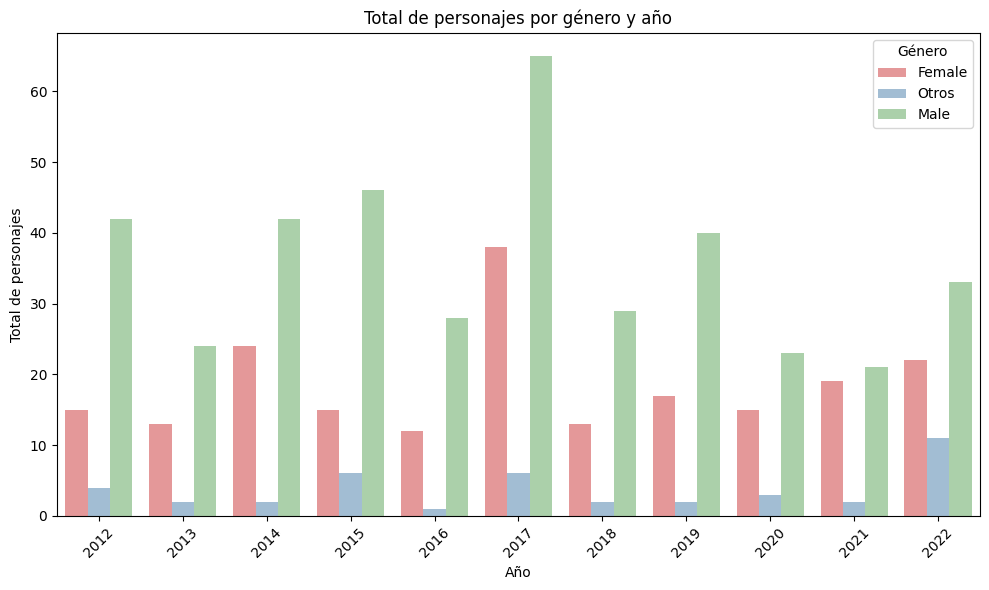

In [44]:
#Total de personajes por género y año

# 1 - Creacion del dataframe
   # Agrupar y contar el número total de personajes por año y género, tratando "Non-binary" y "Custom" como una categoría combinada llamada "Otros"
df['Gender'] = df['Gender'].replace({'Non-binary': 'Otros', 'Custom': 'Otros'})
characters_by_year_gender = df.groupby(['Gender','Release']).size().unstack(fill_value=0)

    # Imprimir el DataFrame resultante
print(characters_by_year_gender)

# 2 - Creación del gráfico de barras

# Crear el countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Release', hue='Gender', palette='Set1', alpha=0.5)

# Personalizar la gráfica
plt.title('Total de personajes por género y año')
plt.xlabel('Año')
plt.ylabel('Total de personajes')
plt.xticks(rotation=45)
plt.legend(title='Género')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

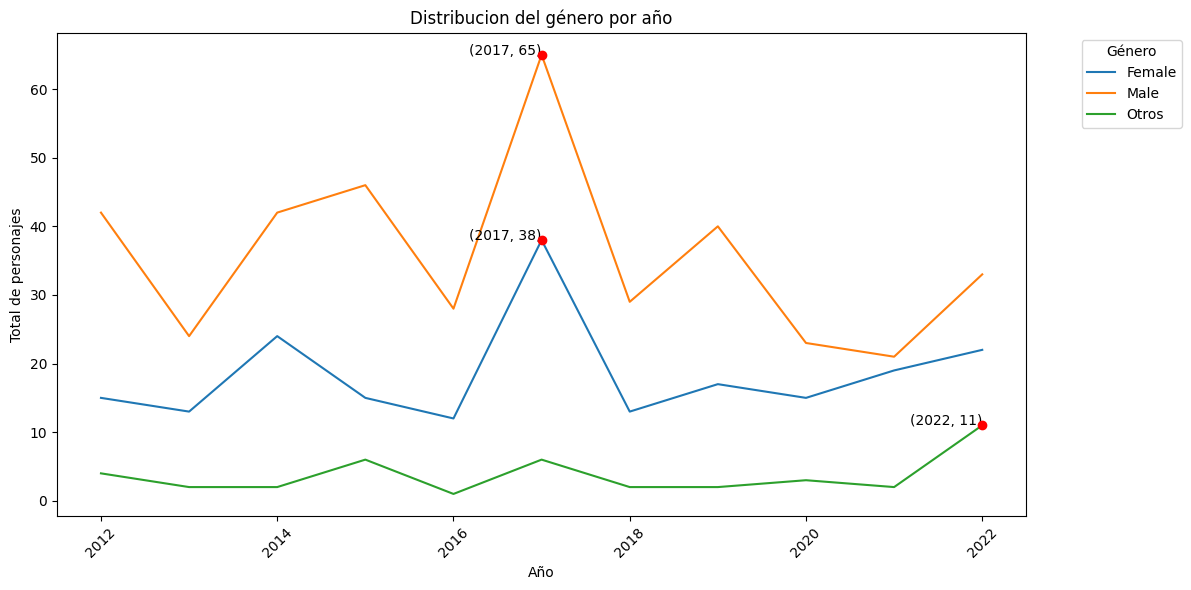

In [45]:
# Filtrar el DataFrame para obtener los datos necesarios
gender_distribution = df.groupby(['Release', 'Gender']).size().unstack(fill_value=0)

# Crear el gráfico de líneas
ax = gender_distribution.plot(kind='line', figsize=(12, 6))

# Identificar los picos y agregar un punto en cada uno
for gender in gender_distribution.columns:
    peak_years = gender_distribution[gender].idxmax()
    peak_counts = gender_distribution[gender].max()
    ax.scatter(peak_years, peak_counts, color='red', zorder=5)
    ax.text(peak_years, peak_counts, f'({peak_years}, {peak_counts})', ha='right')

# Personalizar la gráfica
plt.title('Distribucion del género por año')
plt.xlabel('Año')
plt.ylabel('Total de personajes')
plt.xticks(rotation=45)
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### Conclusiones 1

- La mayoría de los juegos del dataset se lanzaron en 2017.
- Se ve como los personajes masculinos superan en número siempre al resto de géneros y de forma abrumante, aunque hay fluctuaciones anuales.
- En 2021, se ve un aumento significativo de pnj femeninos y junto a otros, igualan a los pnj masculinos
- En 2022 se apostó por los personajes no binarios o personalizables y suponen el 50% con respecto a los de genero femenino y 1/3 del masculino. No obstante, tienen una presencia menor en general.

## Hipotesis 2

En los juegos de Acción y de Aventura imperan los personajes masculinos.

Gender             Female  Male  Otros
Genre                                 
Action                 38    97      5
Action-adventure       59   136     10
Adventure              28    37      7
Interactive Story       4     9      3
RPG                    72   110     16
Simulation              2     4      0


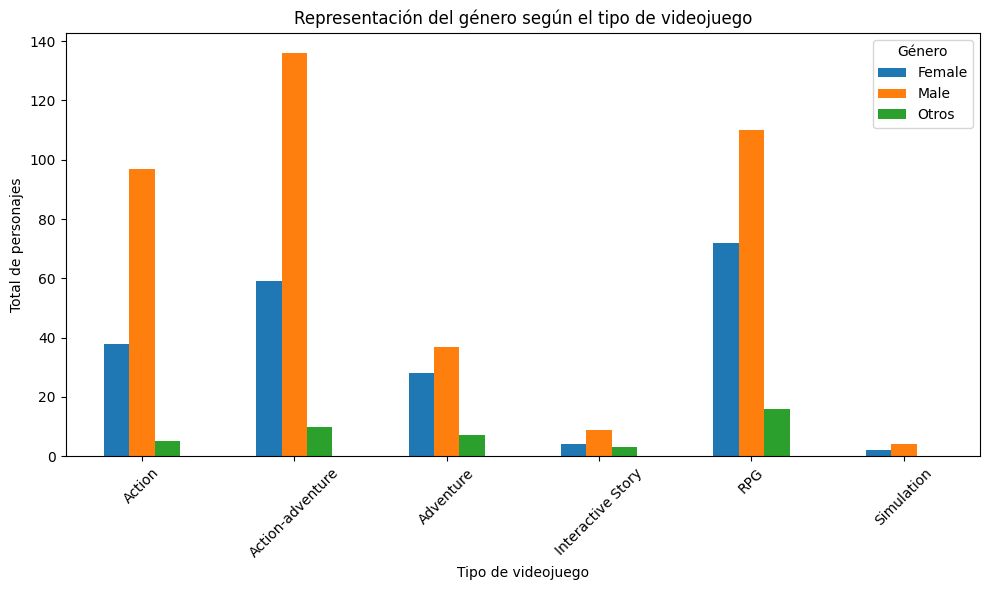

In [46]:
# Representación del género en diferentes tipos de videojuegos

# Filtrar el DataFrame para obtener los datos necesarios
gender_in_genre_df = df.groupby(["Genre", "Gender"]).size().unstack(fill_value=0)

print(gender_in_genre_df)

# Crear el gráfico de barras
gender_in_genre_df.plot(kind="bar", figsize=(10,6))

# Personalizacion
plt.title('Representación del género según el tipo de videojuego')
plt.xlabel('Tipo de videojuego')
plt.ylabel('Total de personajes')
plt.xticks(rotation=45)
plt.legend(title='Género')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### Conclusiones 2

- Este grafico muestra que en los juegos de acción y los de accion y aventura, la tendencia es a tener una mayor proporcion de pernajes masculinos en comparacion con los femeninos. Esto coincide con la tendencia de protagonistas dominados por hombres en estos géneros.
-  Los juegos de aventura y de rol (rpg), parecen que tienen una representacion de genero mas equilibrada. Los personajes femeninos coinciden con más de la mitad de los masculinos.
- Los juegos de Aventura tienen mayor proporción femenina en comparación con otros. Podría deberse a que la industria de los videojuegos está avanzando lentamente hacia una mayor inclusión y diversidad en los últimos años
- Para los juegos de rol, el género incluye otras opciones, lo que indica un esfuerzo consciente para brindar diversas opciones a los jugadores
- Falta de videojuegos de tipo interactivo y de simulación en el dataset

## Hipotesis 3

Los productores y desarrolladores crean más videojuegos con personajes masculinos que femeninos

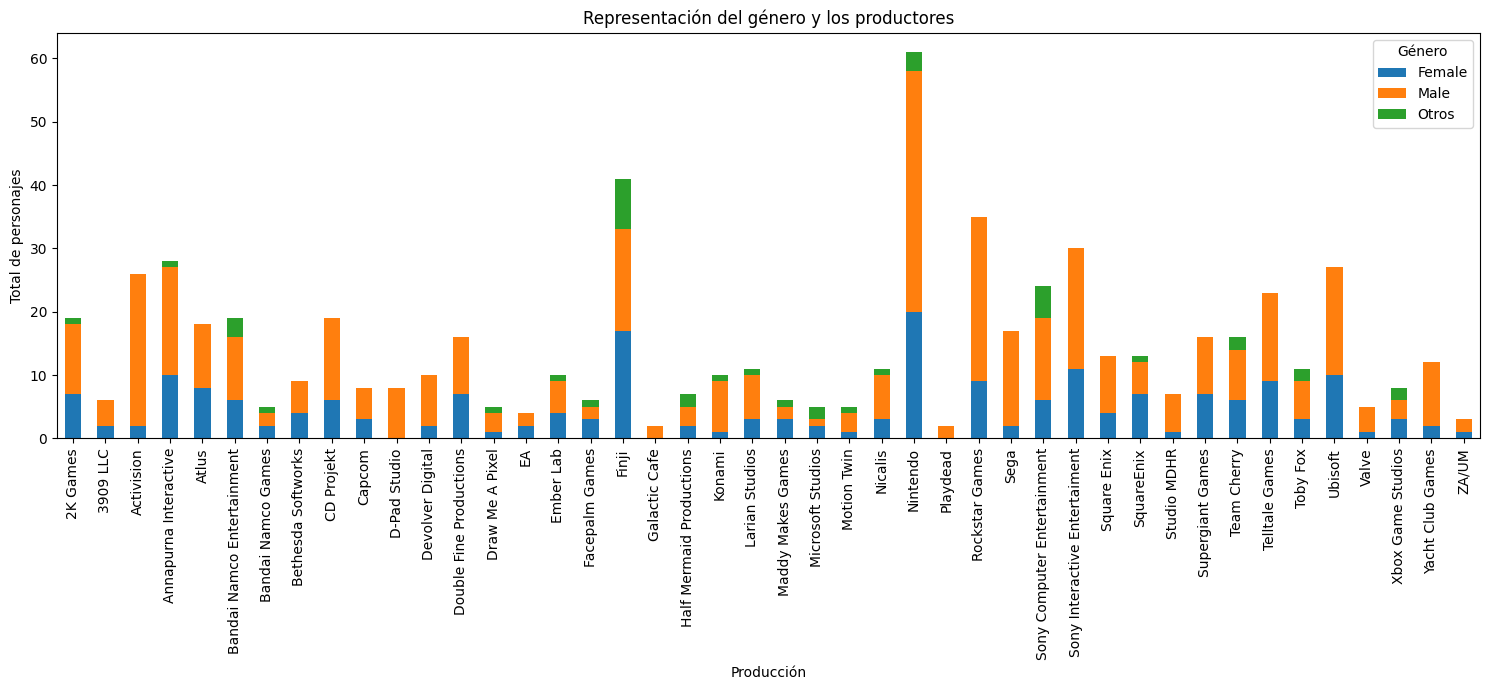

In [47]:
# Representacion del genero y los productores

# Separamos los datos
gender_publisher_df = df.groupby(["Publisher", "Gender"]).size().unstack(fill_value=0)

#Creacion de grafico de barras
gender_publisher_df.plot(kind="bar", stacked=True, figsize=(15,7))

# Personalizacion
plt.title('Representación del género y los productores')
plt.xlabel('Producción')
plt.ylabel('Total de personajes')
plt.legend(title='Género')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### Conclusiones 3
- Con este gráfico se muestra la decision de cada productor en cuanto a la representación de géneros en sus juegos más populares y revela la proporcion de pnjs de cada género.
- Se ve predominancia de más personajes masc frente a los femeninos.
- Solo 21 de 44  productores tienen otro tipos de personajes en sus juegos.
- Hay productores que solo incluyen personajes masculinos

## Análisis de un productor

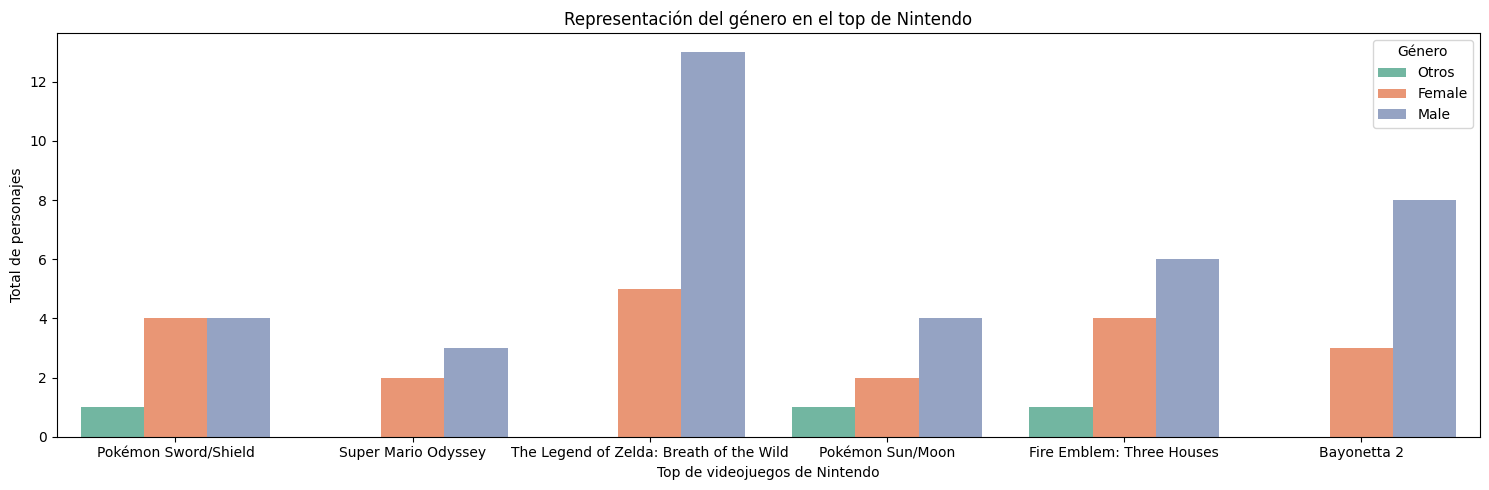

In [48]:
# Representación del género en Nintendo

# Filtrar el DataFrame para obtener solo los datos relacionados con el publisher Nintendo
nintendo_df = df[df['Publisher'] == 'Nintendo']

# Agrupar por título y calcular la media de la puntuación
avg_reviews_by_title = nintendo_df.groupby('Title')['Avg_Reviews'].mean()

# Seleccionar los 6 juegos con la mayor puntuación media
top_nintendo_titles = avg_reviews_by_title.nlargest(6)

# Filtrar el DataFrame original para incluir solo los juegos seleccionados
top_nintendo_games = nintendo_df[nintendo_df['Title'].isin(top_nintendo_titles.index)]


# Crear el gráfico de barras
plt.figure(figsize=(15, 5))
sns.countplot(data=top_nintendo_games, x='Title', hue='Gender', palette="Set2")
plt.title('Representación del género en el top de Nintendo')
plt.xlabel('Top de videojuegos de Nintendo')
plt.ylabel('Total de personajes')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

**Notas**
- Es casi imposible encontrar un productor o un desarrollador que sea representativo de toda la industria, pero el impacto de Nintendo es el mayor.
- Se muestra que los juegos más vendidos de Nintendo tienen personajes masculinos.
- En el gráfico no se muestra el sexismo dentro de las narrativas por lo que habría que verlo.
- La principal representacion "igual" en Pkm Espada/Escudo es porque puedes elegir el genero y los personajes en el juego no son representativos solo sirven para llevar batallas por turnos.
- Zelda es uno de los juegos más icónicos, pero el representante es Link, un hombre.
- Bayonetta, es uno de los personajes más sexualizados de Nintendo, pero es la protagonista. Tendría sentido que su aspecto se deba a algo más.

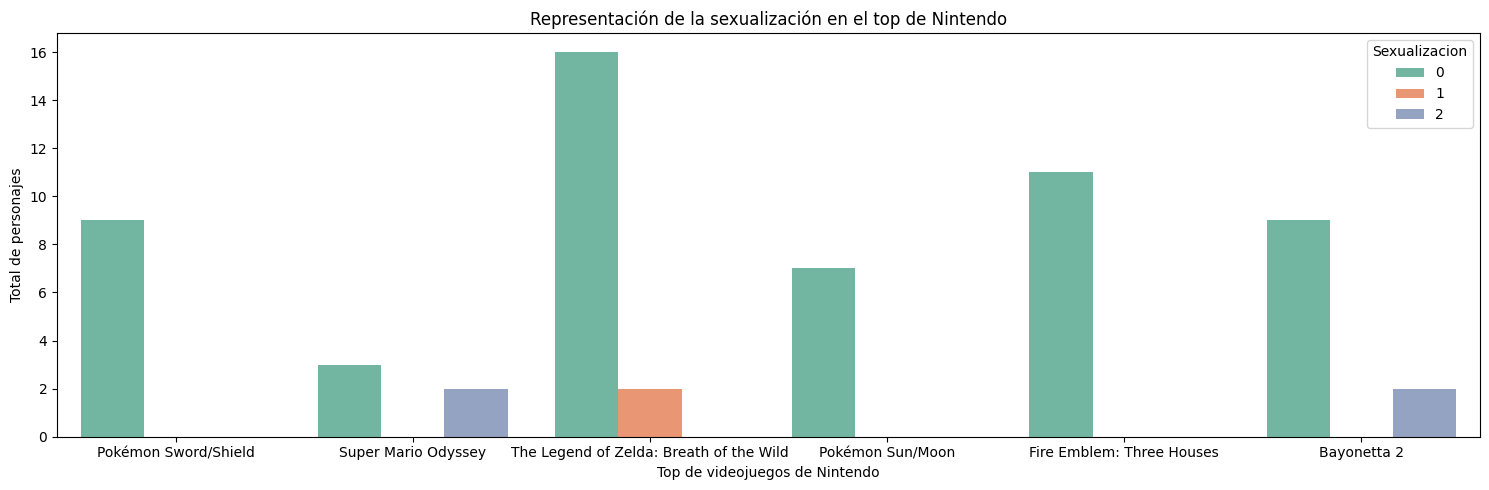

In [49]:
# Representación de la sexualización en el top de Nintendo

# Crear el gráfico de barras
plt.figure(figsize=(15, 5))
sns.countplot(data=top_nintendo_games, x='Title', hue='Sex_Total', palette="Set2")
plt.title('Representación de la sexualización en el top de Nintendo')
plt.xlabel('Top de videojuegos de Nintendo')
plt.ylabel('Total de personajes')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Sexualizacion')
plt.tight_layout()
plt.show()

**Notas**
- Como resaltaba anteriormente, la sexualizacion es evidente en Bayonetta, pero tambien en Zelda (princesa en apuros) y en Mario (princesas en apuros)

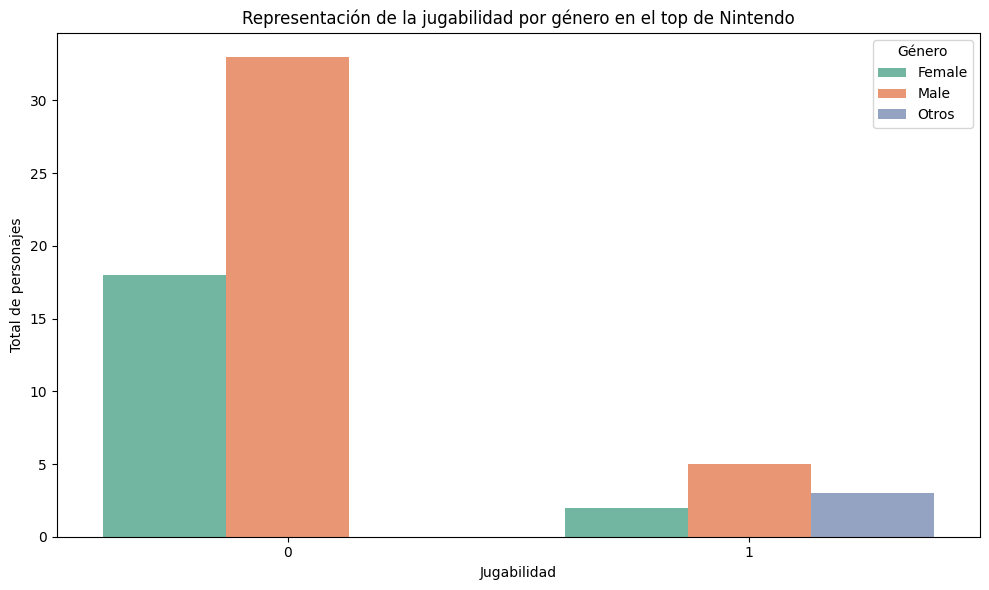

In [50]:
# Representación de la jugabilidad por género en el top de Nintendo

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=top_nintendo_games, x='Playable', hue='Gender', palette="Set2")
plt.title('Representación de la jugabilidad por género en el top de Nintendo')
plt.xlabel('Jugabilidad')
plt.ylabel('Total de personajes')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

**Notas**
- Destaca que entre los personajes jugables (1), la mayoría sean masculinos y que otros géneros jugables superan también a los personajes femeninos jugables.
- En el dataset abundan los personajes que no son jugables por lo que vemos en la barra con el 0 (no jugable)

## Hipotesis 4

Los personajes principales suelen ser masculinos.

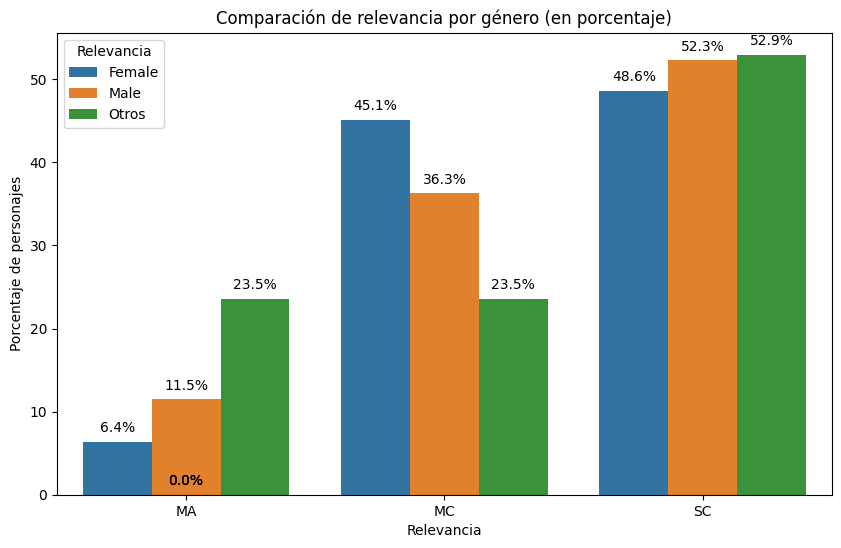

In [51]:
# Comparación de la relevancia por genero: fem vs masc vs otros en porcentaje

# Filtrar el DataFrame original para incluir solo las relevancias MA, MC y SC
relevant_characters_df = df[df['Relevance'].isin(['MA', 'MC', 'SC'])]

# Agrupar por género y relevancia y contar el número de personajes
grouped_df = relevant_characters_df.groupby(['Gender', 'Relevance']).size().reset_index(name='count')

# Calcular el total de personajes con relevancias MA, MC y SC en cada género
total_per_relevance_per_gender = grouped_df.groupby('Gender')['count'].transform('sum')

# Calcular el porcentaje de personajes con cada relevancia sobre el total de personajes con esa misma relevancia en cada género
grouped_df['percentage'] = (grouped_df['count'] / total_per_relevance_per_gender) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=grouped_df, x='Relevance', y='percentage', hue='Gender')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
plt.title('Comparación de relevancia por género (en porcentaje)')
plt.xlabel('Relevancia')
plt.ylabel('Porcentaje de personajes')
plt.legend(title='Relevancia')
plt.show()

### Conclusiones 4

- MA: sorprende ver que otros generos superan al resto en esta categoria.
- MC: para sorpresa, los mc fem superan (por menos del 10%) a los mc masc
- SC: los porcentajes están muy igualados, destacando pnj de otros generos por un 0,6% vs masc

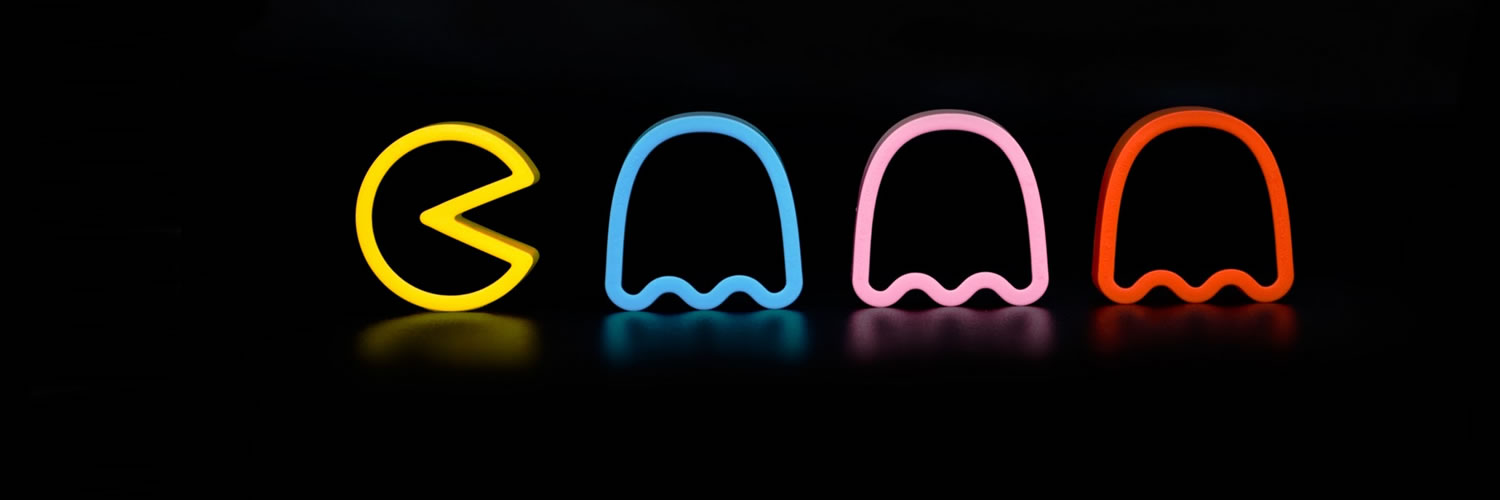